## 파이썬 라이브러리를 활용한 데이터 분석과 시각화

### numpy
* numpy는 n차원 데이터를 빠르고 쉽게 계산할 수 있게 해 주는 라이브러리입니다.
*  https://numpy.org/

### pandas
* pandas는 데이터 분석과 조작을 도와주는 라이브러리입니다.
*  https://pandas.pydata.org/

##  시각화 도구

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* https://matplotlib.org/

### matplotlib.pyplot
* pyplot은 matplotlib에 대한 상태 기반 인터페이스입니다.
* 파이썬의 가장 인기있는 데이터 시각화 도구입니다.
*  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### seaborn
* seaborn은 matplotlib에 기반한 통계적 데이터 시각화 지원 라이브러리입니다.
* pyplot을 사용하기 쉽게 추상화 한 시각화 도구 입니다.
*  https://seaborn.pydata.org/

### pandas visualization
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 저장한 Dataframe을 불러와 변수 df에 지정해줍니다.
# kosis-cancer.csv
df = pd.read_csv('data/kosis-cancer.csv')
print(df.shape)
df.head()

(1238, 7)


,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
0,20 ~ 24세,2016,위암,남자,0,0,20대
1,20 ~ 24세,2016,위암,여자,0,0,20대
2,20 ~ 24세,2016,대장암,남자,0,0,20대
3,20 ~ 24세,2016,대장암,여자,0,0,20대
4,20 ~ 24세,2016,간암,남자,0,0,20대


## 한글폰트 설정하기

In [3]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [4]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와줍니다.
get_font_family()

'Malgun Gothic'

In [8]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 폰트설정 확인하기

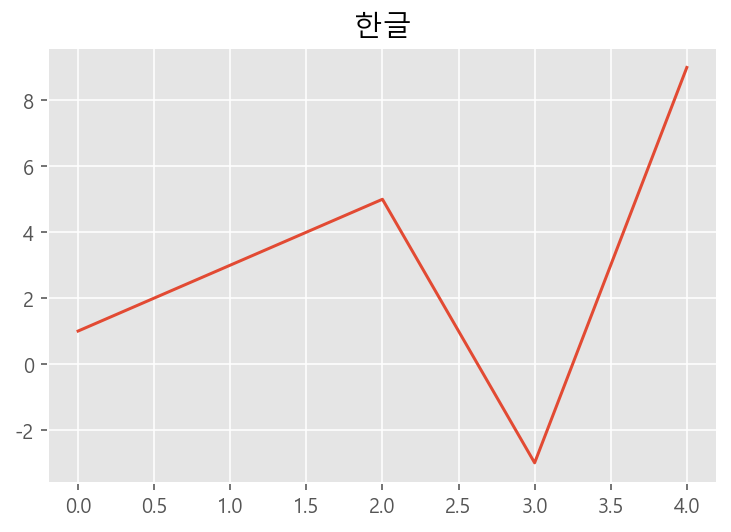

In [11]:
# 한글 폰트가 정상적으로 작동하는지 확인하기
pd.Series([1,3,5,-3,9]).plot(title='한글')
plt.show()

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

In [15]:
# "암검진별" column의 value별 개수를 확인해 봅니다.
df['암검진별'].value_counts()

위암       252
간암       252
대장암      248
자궁경부암    244
유방암      242
Name: 암검진별, dtype: int64

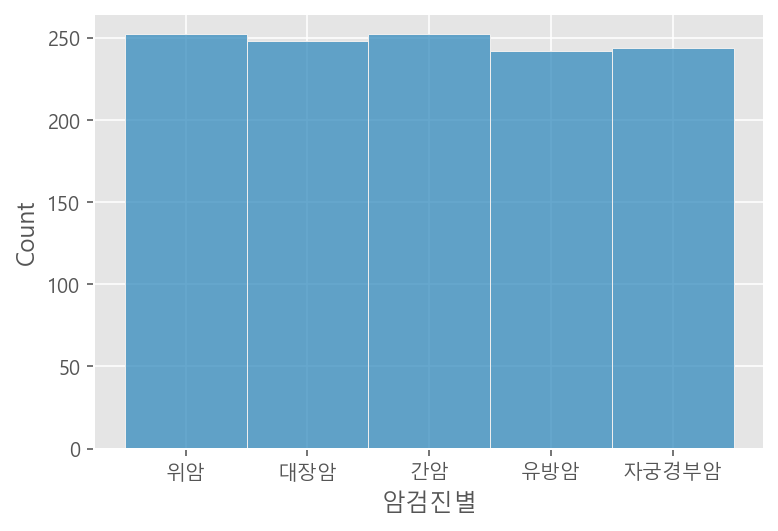

In [26]:
# seaborn을 활용하여 암검진별 빈도수를 표현할 수 있습니다.
sns.histplot(data=df, x='암검진별')
plt.show()

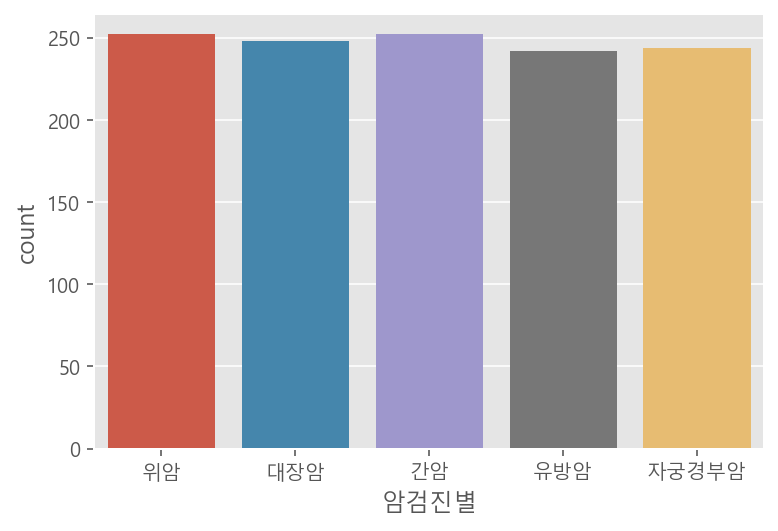

In [25]:
# seaborn countplot을 활용하여 암검진별 빈도수를 표현 합니다.
sns.countplot(data=df, x='암검진별')
plt.show()

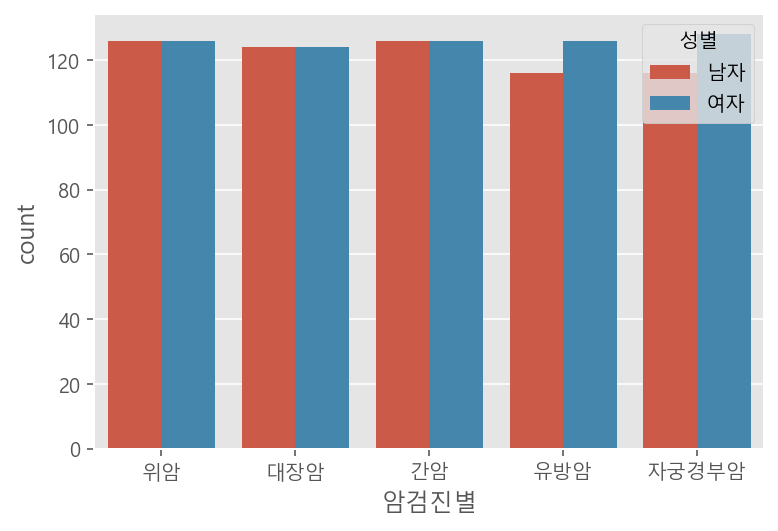

In [28]:
# seaborn countplot을 활용하여 암검진별 빈도수를 표현 합니다. hue="성별"에 따라 다른 색상으로 표현합니다.
sns.countplot(data=df, x='암검진별', hue='성별')
plt.show()

In [30]:
# 데이터가 0 인것은 빈도수 계산에서 제외하도록
# 대상인원 이 0 보다 큰 데이터만 찾습니다.
df[df['대상인원'] > 0]

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
9,20 ~ 24세,2016,자궁경부암,여자,736010,138829,20대
19,20 ~ 24세,2017,자궁경부암,여자,746162,166205,20대
29,20 ~ 24세,2018,자궁경부암,여자,677586,170449,20대
39,20 ~ 24세,2019,자궁경부암,여자,616456,184179,20대
49,25 ~ 29세,2016,자궁경부암,여자,509967,196687,20대
...,...,...,...,...,...,...,...
1231,85세 이상,2019,대장암,여자,369494,37486,80대
1232,85세 이상,2019,간암,남자,2011,661,80대
1233,85세 이상,2019,간암,여자,3592,914,80대
1235,85세 이상,2019,유방암,여자,171274,22476,80대


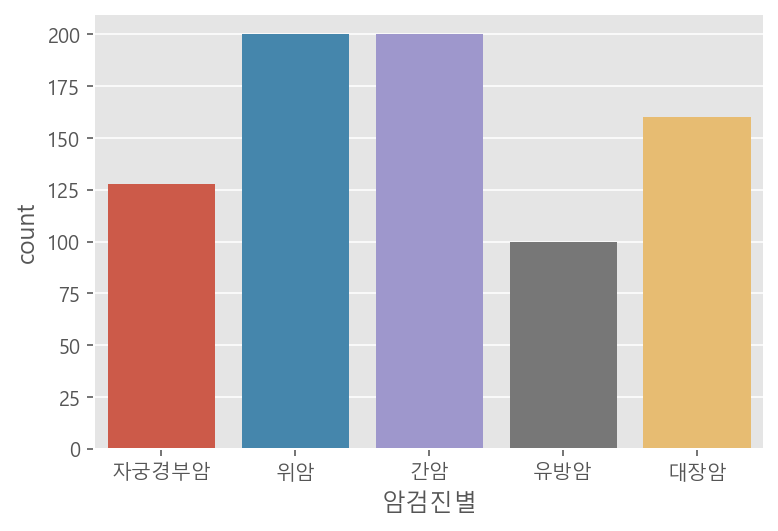

In [32]:
# 데이터 > 0 보다 큰 데이터로 빈도수 시각화 해보기
sns.countplot(data = df[df['대상인원'] > 0], x='암검진별')
plt.show()

### crosstab 으로 두 개의 빈도수 구하기

In [34]:
# crosstab 으로 시각화 결과를 구하기 df["성별"], df["암검진별"]
pd.crosstab(index=df['성별'], columns=df['암검진별'])

암검진별,간암,대장암,위암,유방암,자궁경부암
성별,,,,,
남자,126,124,126,116,116
여자,126,124,126,126,128


## 수치형 데이터

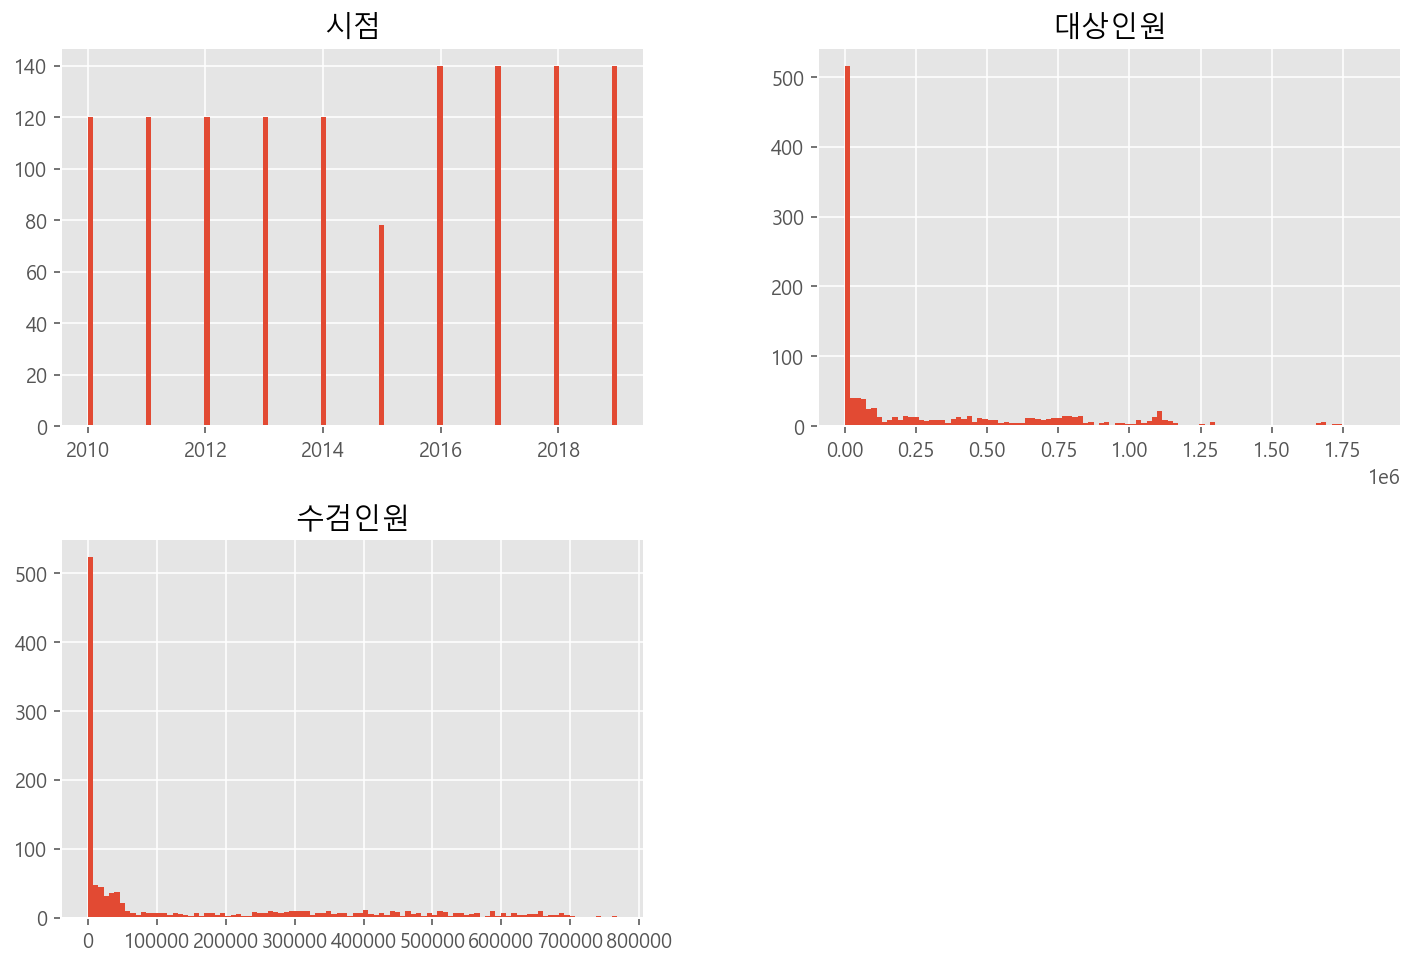

In [44]:
# .hist 를 사용하면 전체 수치 데이터에 대한 시각화를 할 수 있습니다.
_ = df.hist(figsize=(12,8),bins=100)

## 2019 년 데이터만 보기

In [41]:
# 2019년의 데이터를 확인하기 위해 2019년의 데이터만 지정해줍니다.
# df_2019
df_2019 = df[df['시점']==2019]
df_2019.head()

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
30,20 ~ 24세,2019,위암,남자,0,0,20대
31,20 ~ 24세,2019,위암,여자,0,0,20대
32,20 ~ 24세,2019,대장암,남자,0,0,20대
33,20 ~ 24세,2019,대장암,여자,0,0,20대
34,20 ~ 24세,2019,간암,남자,0,0,20대


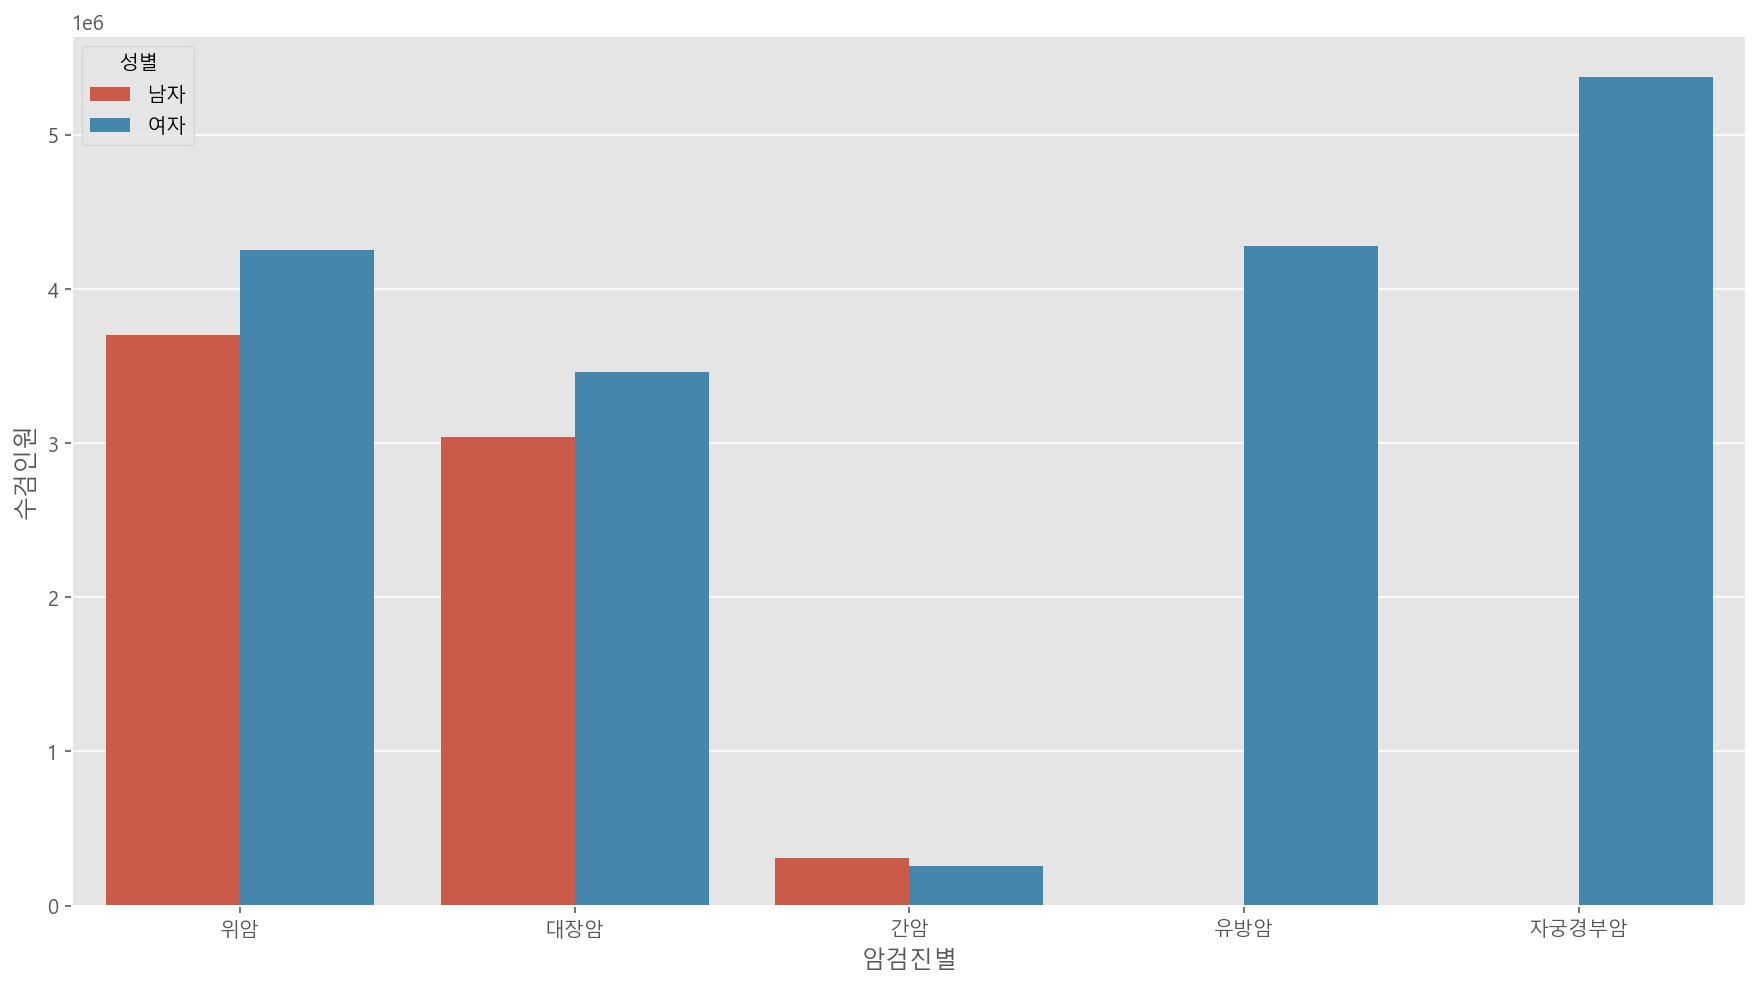

In [53]:
# seaborn의 barplot을 사용해서 데이터를 시각화 할 수 있습니다.
# x축에는 암검진별, y축에는 데이터, hue값에는 성별을 넣어줍니다.
# 2019년 남자와 여자의 암검진별 수검인원을 비교합니다.
plt.figure(figsize=(15, 8))
_ = sns.barplot(data=df_2019, x='암검진별', y='수검인원', hue='성별', ci=None, estimator=np.sum)

<Figure size 1080x432 with 0 Axes>

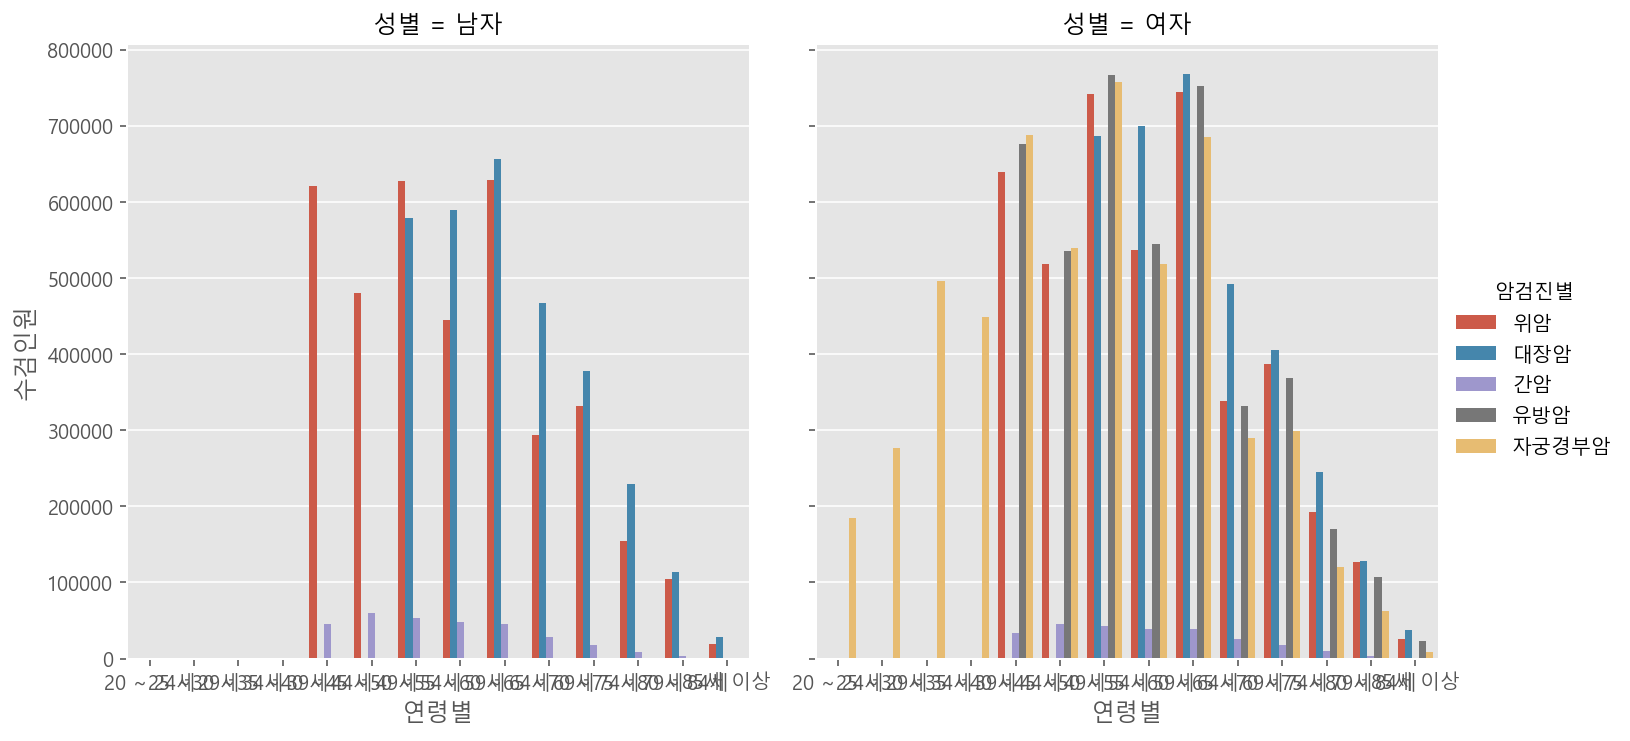

In [55]:
# 2019년의 x="연령별", y='수검인원', hue='암검진별', kind="bar", col="성별" 시각화
plt.figure(figsize=(15, 6))
sns.catplot(data=df_2019, kind='bar', x='연령별', y='수검인원', hue='암검진별', col='성별')

## 연도별 암검진 현황
### 평균 시각화

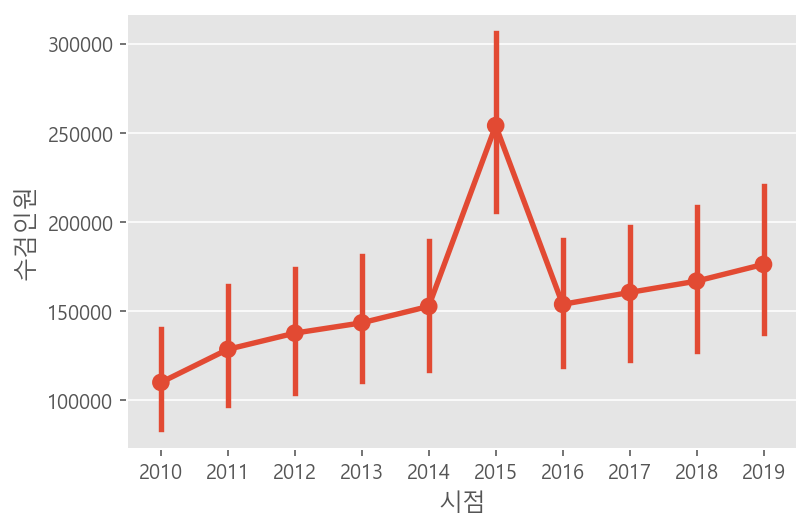

In [57]:
# pointplot 으로 연도별 암검진 **평균** 수검인원을 시각화 합니다.
df
_ = sns.pointplot(data=df, x='시점', y='수검인원', estimator=np.mean)

### 합계 시각화

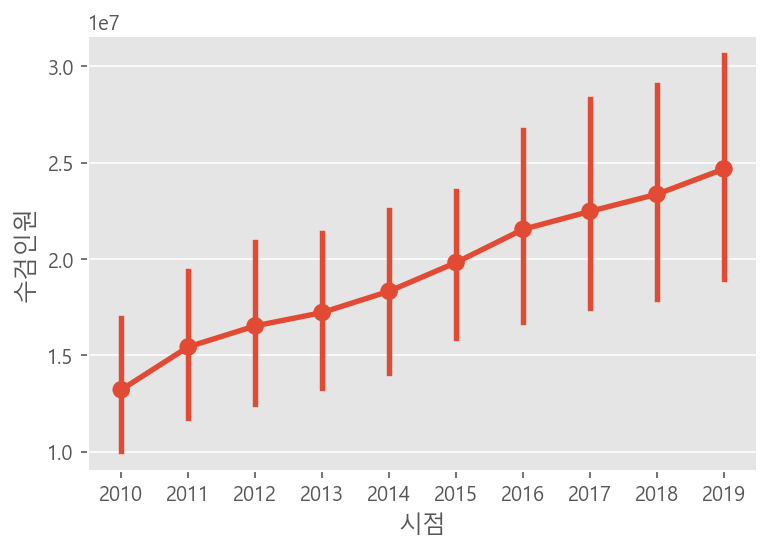

In [64]:
# pointplot 으로 연도별 암검진 **합계** 수검인원을 시각화 합니다.
_ = sns.pointplot(data=df, x='시점', y='수검인원', estimator=np.sum)

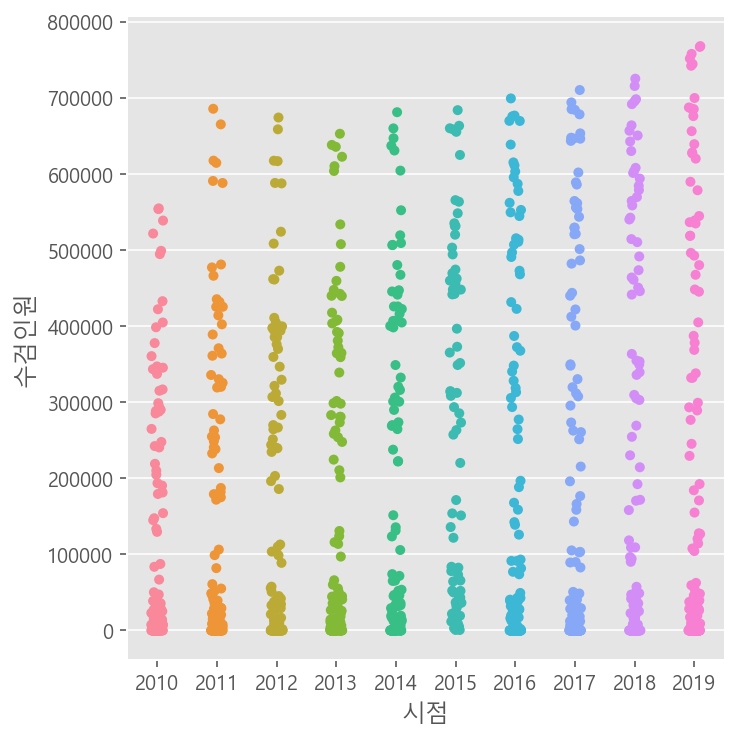

In [66]:
# catplot 으로 연도별 암검진 수검인원을 시각화 합니다.
_ = sns.catplot(data=df, x='시점', y='수검인원')

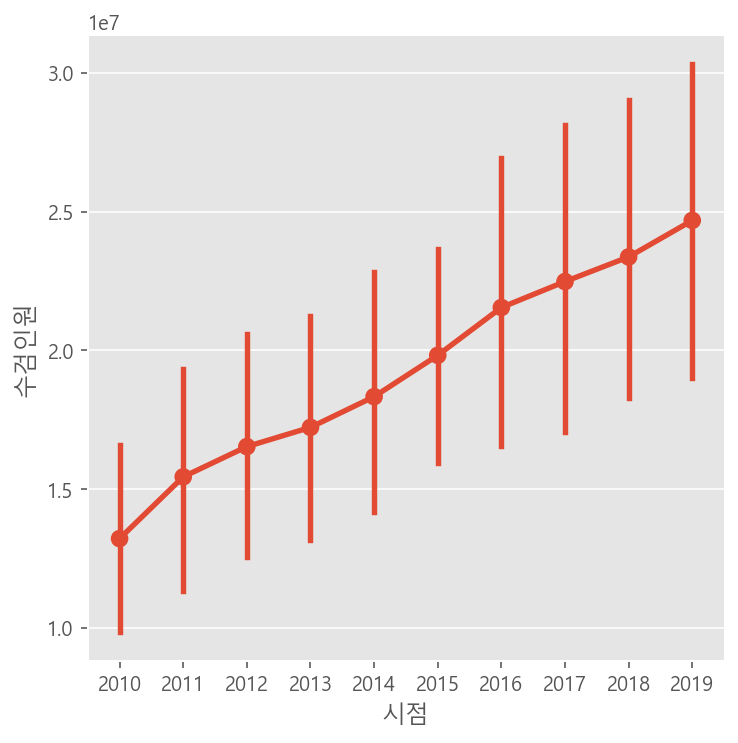

In [69]:
# catplot 으로 연도별 암검진 수검인원 **합계**를 pointplot으로 시각화 합니다.
_ = sns.catplot(data=df, x='시점', y='수검인원', estimator=np.sum, kind='point')

## groupby와 pivot_table활용해보기
<img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">

<img src = 'https://pandas.pydata.org/docs/_images/reshaping_pivot.png' width = '600'>

In [81]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df.groupby(['성별','연령대'])['대상인원','수검인원'].agg([np.sum])

<ipython-input-81-e26ea5bbb55a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['성별','연령대'])['대상인원','수검인원'].agg([np.sum])


대상인원      수검인원
             sum       sum
성별 연령대                    
남자 20대         0         0
   30대         0         0
   40대  21409939   9953709
   50대  50740361  18562533
   60대  30465590  15242629
   70대  16704162   8141917
   80대   4949658   1509451
여자 20대   4911944   1638750
   30대  14980548   7090353
   40대  58008535  32808981
   50대  85939622  45255252
   60대  55583138  32637875
   70대  36237665  16649497
   80대  16960232   3118838

In [88]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index=['성별','연령대'], values=['대상인원','수검인원'], aggfunc=np.sum)

대상인원      수검인원
성별 연령대                    
남자 20대         0         0
   30대         0         0
   40대  21409939   9953709
   50대  50740361  18562533
   60대  30465590  15242629
   70대  16704162   8141917
   80대   4949658   1509451
여자 20대   4911944   1638750
   30대  14980548   7090353
   40대  58008535  32808981
   50대  85939622  45255252
   60대  55583138  32637875
   70대  36237665  16649497
   80대  16960232   3118838

In [95]:
pd.pivot_table(data=df, index='시점', columns='연령대', values='수검인원', aggfunc=np.sum, fill_value=0)

연령대,20대,30대,40대,50대,60대,70대,80대
시점,,,,,,,
2010,0,274389,3533935,4642869,3133814,1440461,186776
2011,0,503397,3914357,5482910,3512717,1788981,235740
2012,0,576735,3848316,5727622,3926643,2150944,297896
2013,0,637679,4011937,5937390,4036869,2254606,343046
2014,0,694529,4129279,6163947,4474726,2450073,415543
2015,0,790572,4436662,6593738,4949353,2557788,490351
2016,335516,845125,4673448,6935630,5416575,2776806,558709
2017,417436,904046,4737311,7148717,5703856,2935851,629270
2018,424916,919442,4598820,7506389,6140446,3098932,675719
